# Logistic Regression

## Bank Marketing Project

The data is related to direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be `('yes')` or not `('no')` subscribed.

- In this project, you need to build a model for deciding whether a campaign will be successful in getting a client to sign up for the term deposits


# Step 1: Data understanding and exploration

In [4]:
# supress warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
# essensial packages for data frame

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks

In [6]:
# importing data-set

bank = pd.read_csv('C:/Users/Vishnu Kant Shukla/Desktop/B.tech/upGrad/Assignments of upGrad/classification/bank.csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
bank.shape

(4521, 17)

In [29]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [30]:
# type of each columns

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


## Exploratory Data Analysis

### Univariate / Variate Analysis

#### Target : "y" has the client subscribed a term deposit? (binary: "yes","no")

In [7]:
bank.y.describe()

count     4521
unique       2
top         no
freq      4000
Name: y, dtype: object

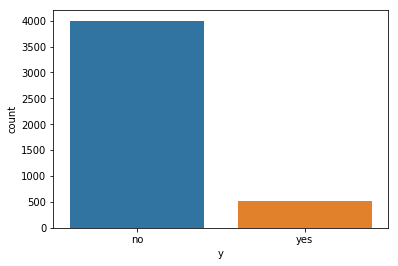

In [8]:
sns.countplot(bank.y)

In [8]:
bank['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

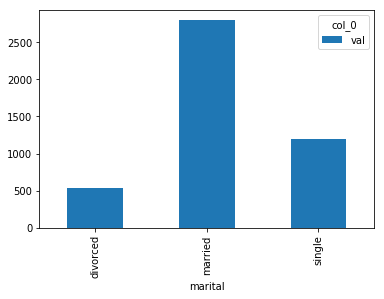

In [11]:
pd.crosstab(index = bank['marital'], columns = 'val').plot.bar()

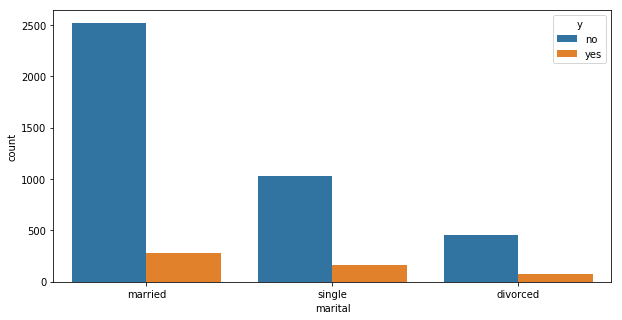

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(bank['marital'], hue = bank['y'], data = bank)

In [13]:
bank['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

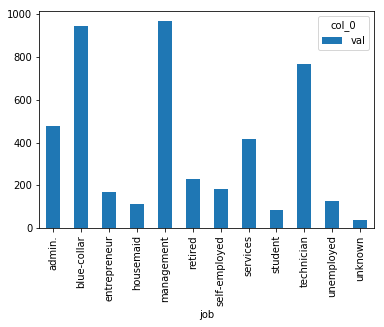

In [14]:
pd.crosstab(bank['job'], columns = 'val').plot.bar()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

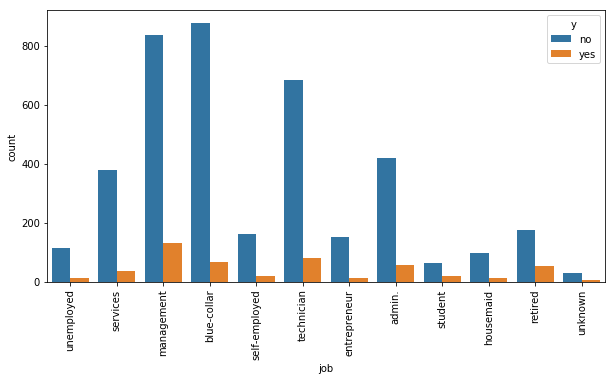

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(bank['job'], hue = bank['y'], data = bank)
xticks(rotation = 90)

In [16]:
bank['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

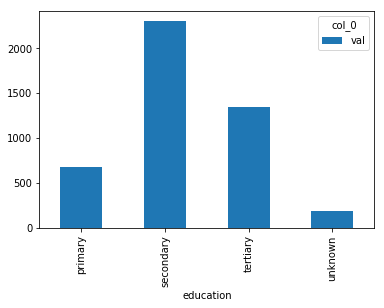

In [17]:
pd.crosstab(bank.education, columns = 'val').plot.bar()

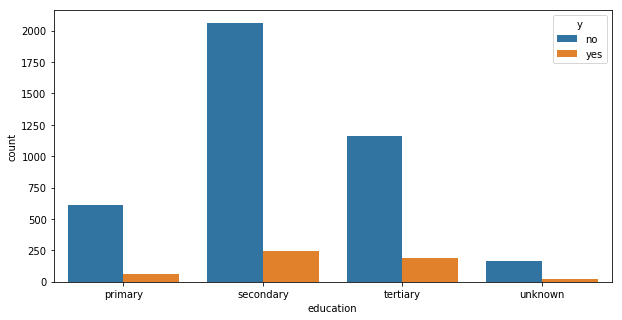

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(bank['education'], hue = bank['y'], data = bank)

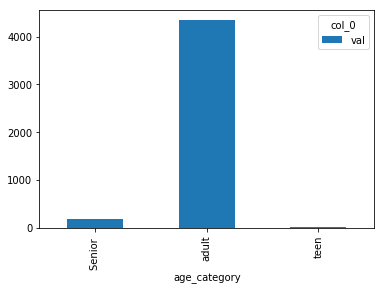

In [20]:
bank['age_category'] = bank['age'].apply(lambda x : 'teen' if x <= 19 else ('adult' if 20 <= x < 60 else "Senior "))


pd.crosstab(bank.age_category, columns = 'val').plot.bar()

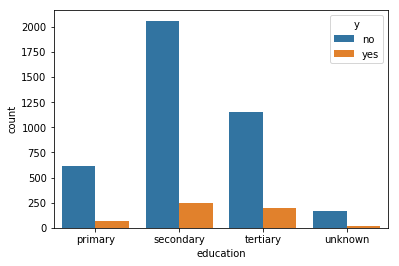

In [21]:
age_category = bank[['age', 'age_category', 'y']]
sns.countplot(bank['education'], hue = bank['y'], data = bank)

In [22]:
bank.drop('age_category', axis='columns', inplace=True)

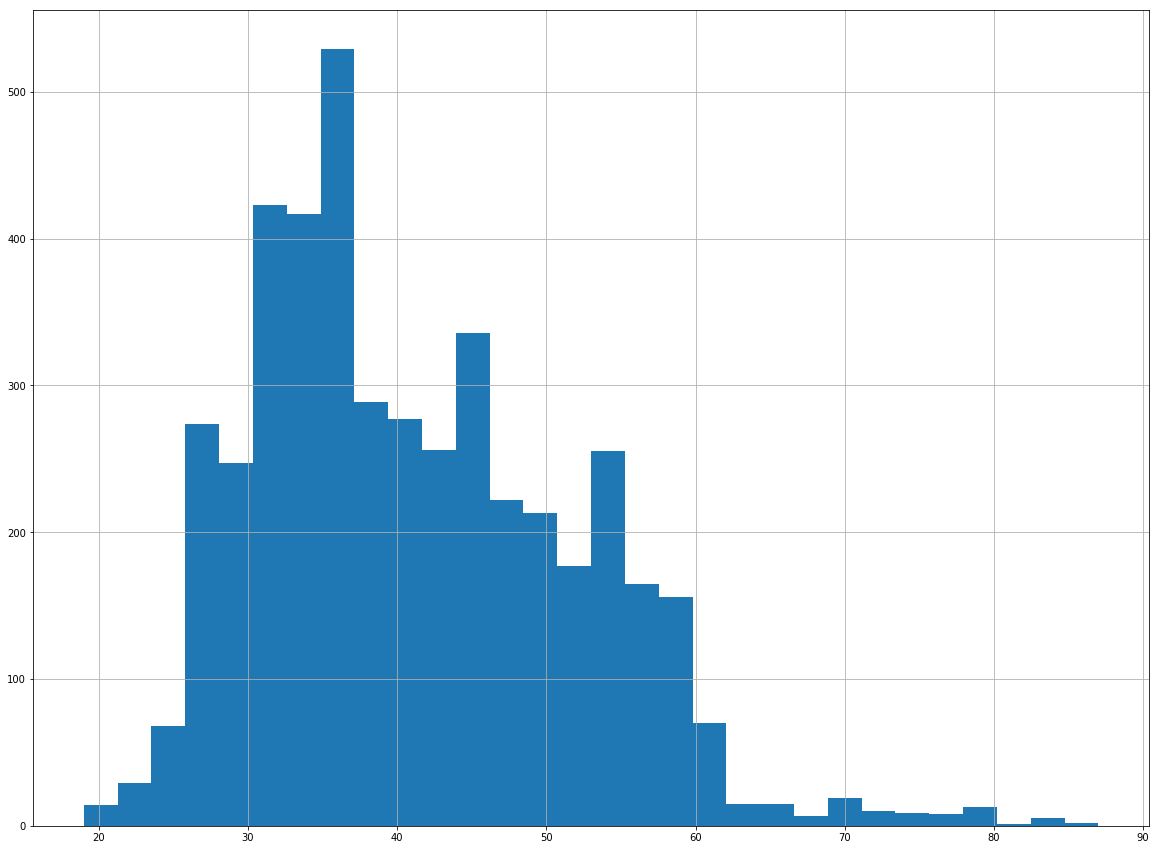

In [25]:
bank['age'].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

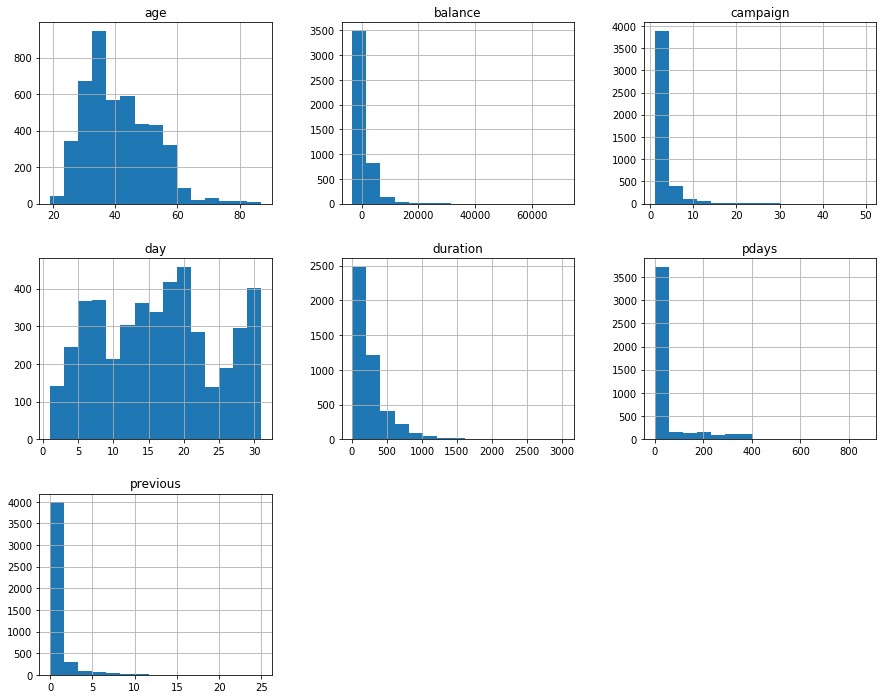

In [26]:
bank.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

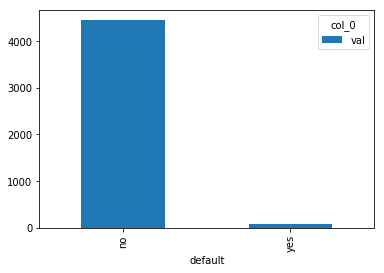

In [28]:
pd.crosstab(index = bank['default'], columns = 'val').plot.bar()

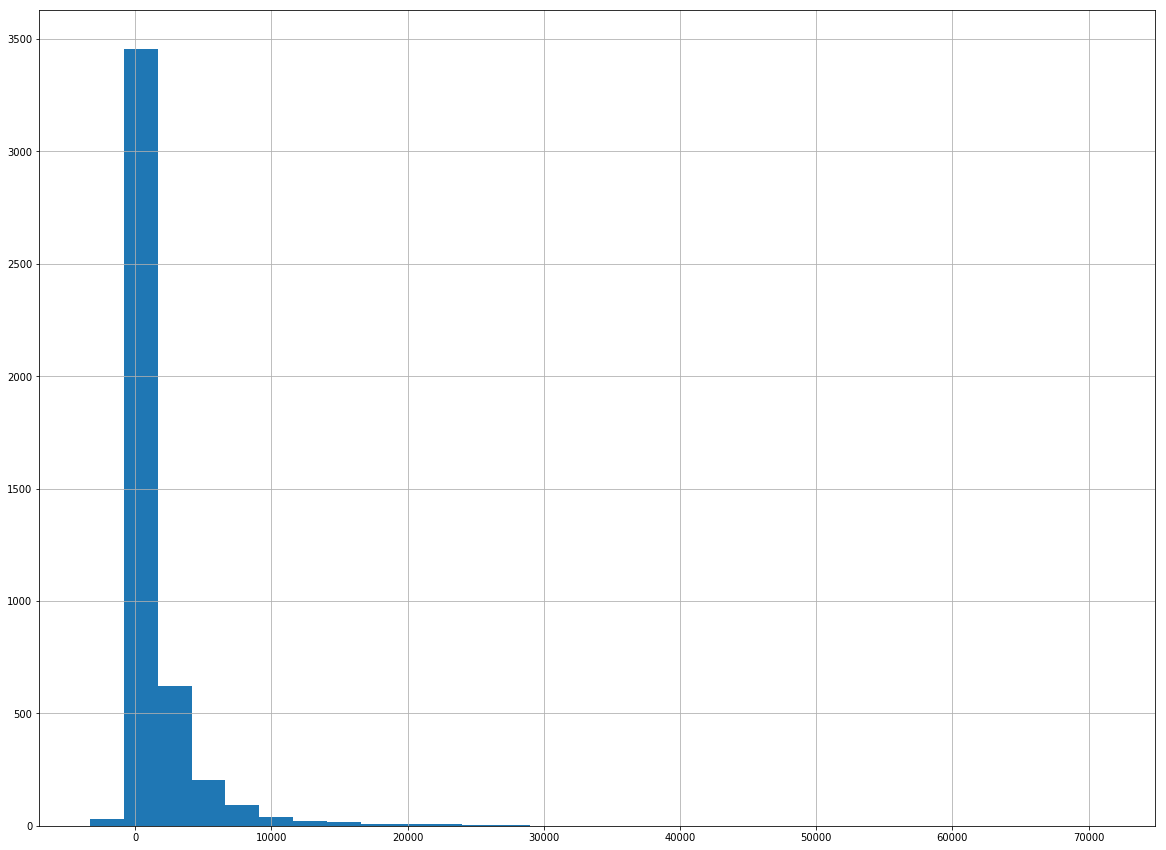

In [30]:
bank['balance'].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

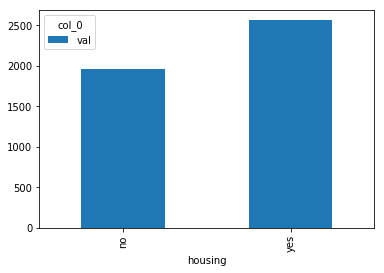

In [32]:
pd.crosstab(index = bank['housing'], columns = 'val').plot.bar()

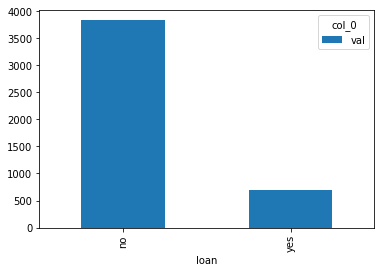

In [33]:
pd.crosstab(index = bank['loan'], columns = 'val').plot.bar()

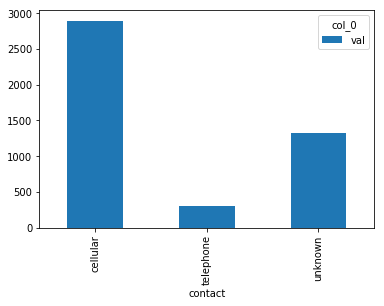

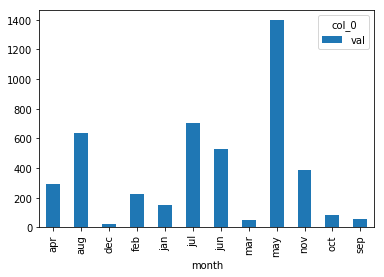

In [43]:
pd.crosstab(index = bank['contact'], columns = 'val').plot.bar()

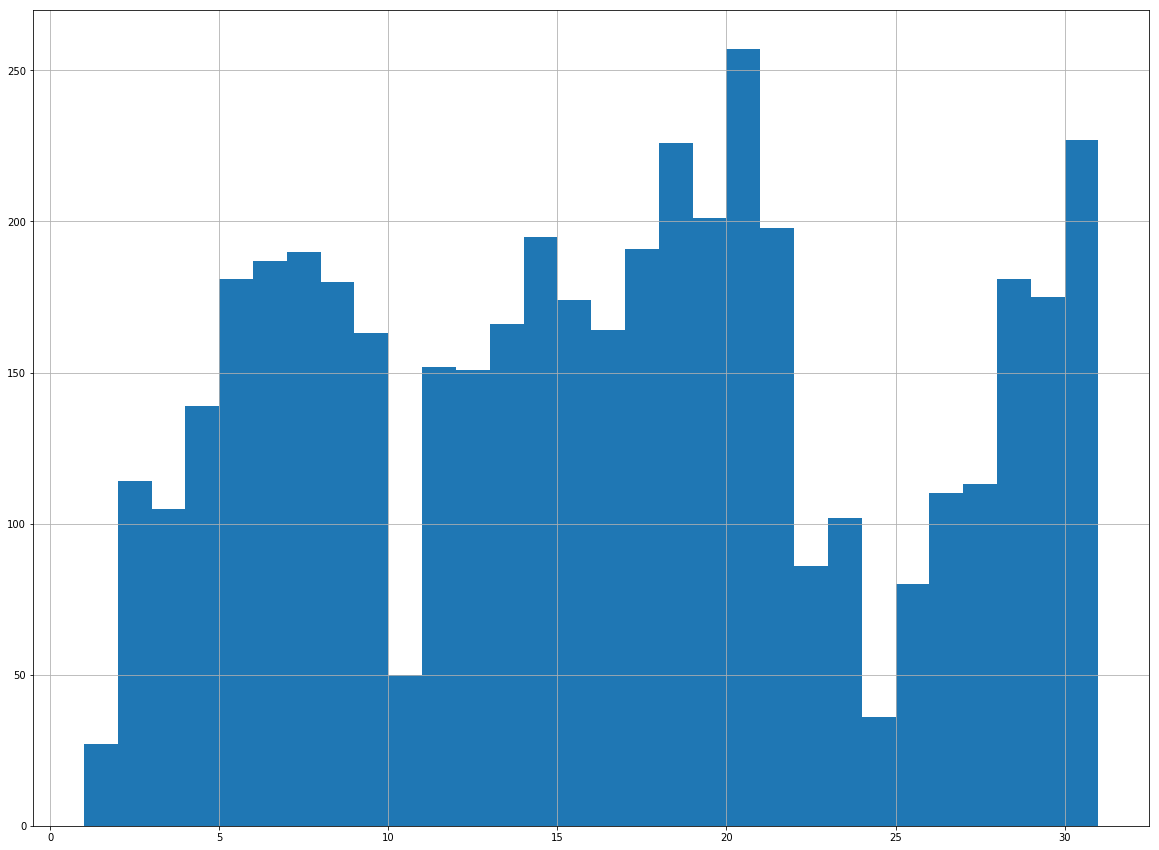

In [49]:
bank['day'].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

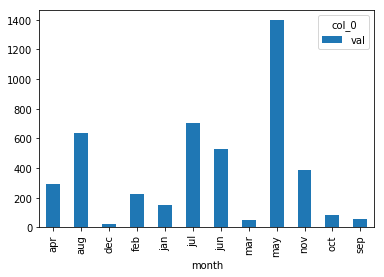

In [47]:
pd.crosstab(index = bank['month'], columns = 'val').plot.bar()

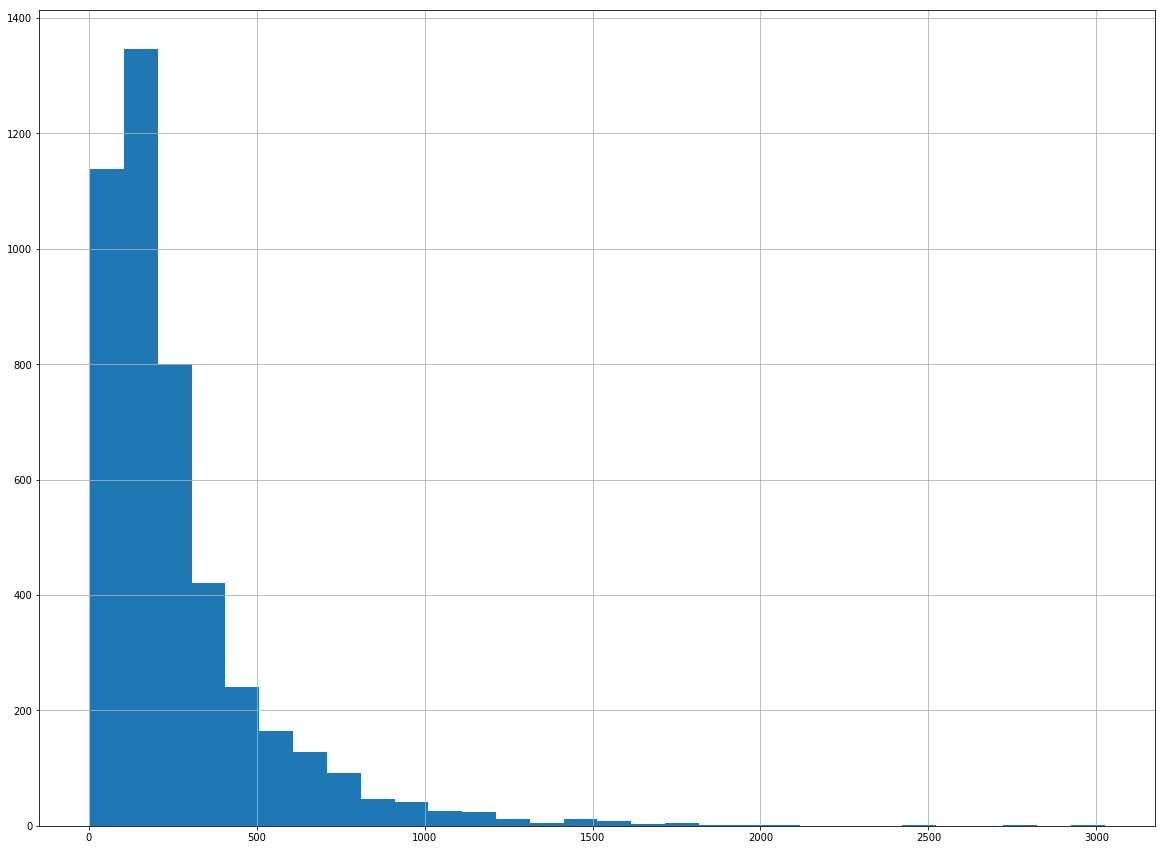

In [50]:
bank['duration'].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

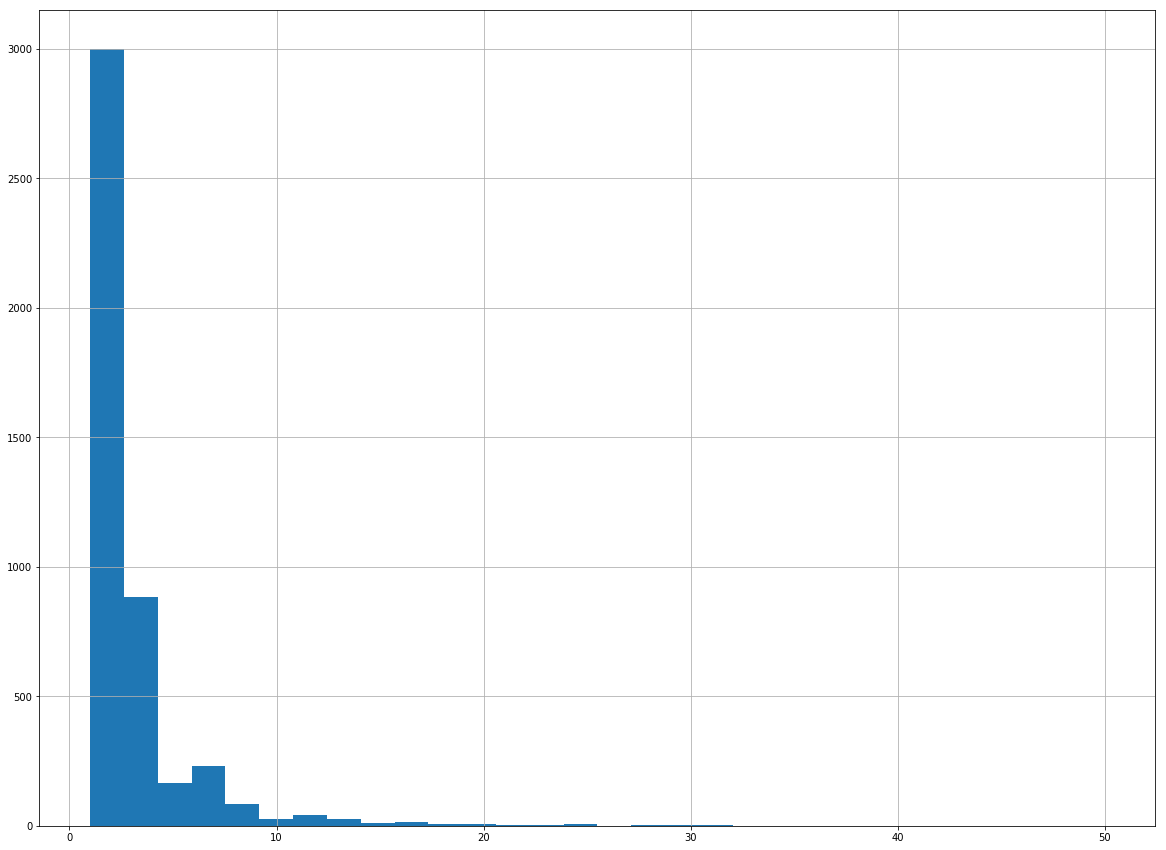

In [51]:
bank['campaign'].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

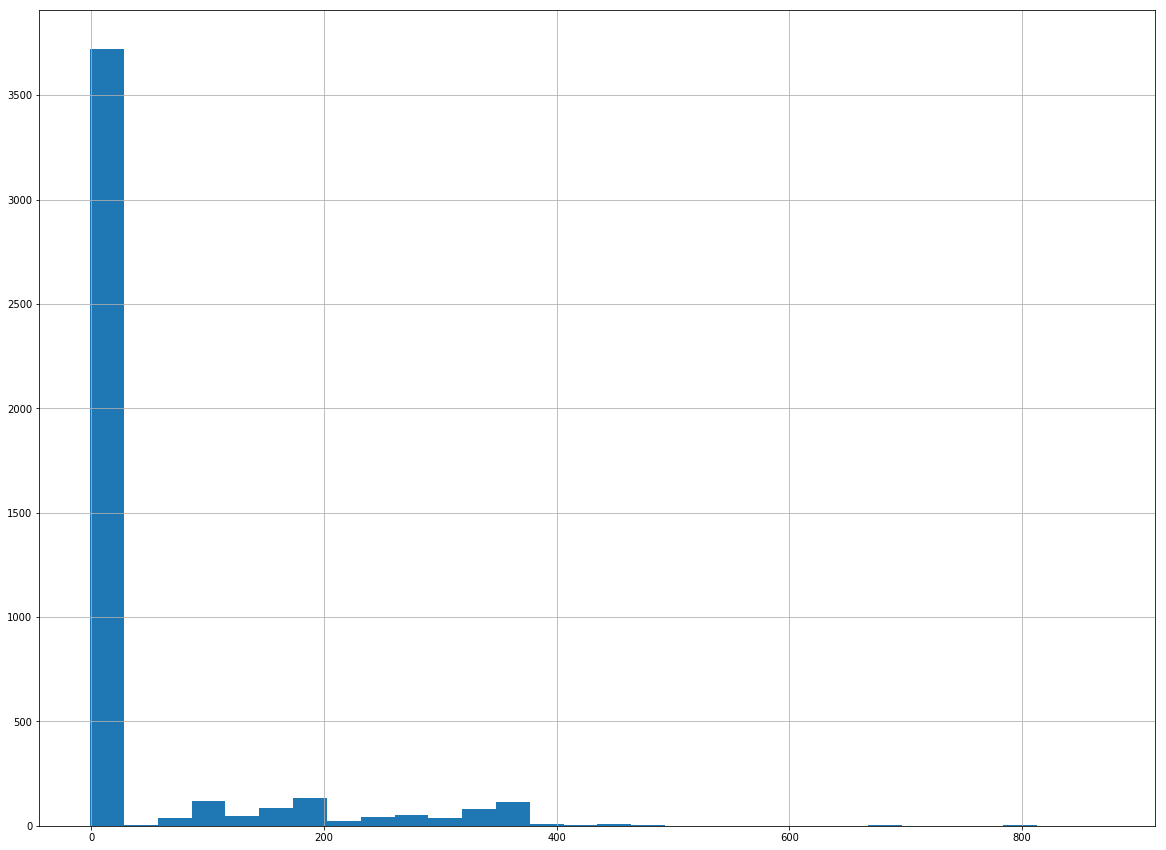

In [52]:
bank['pdays'].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

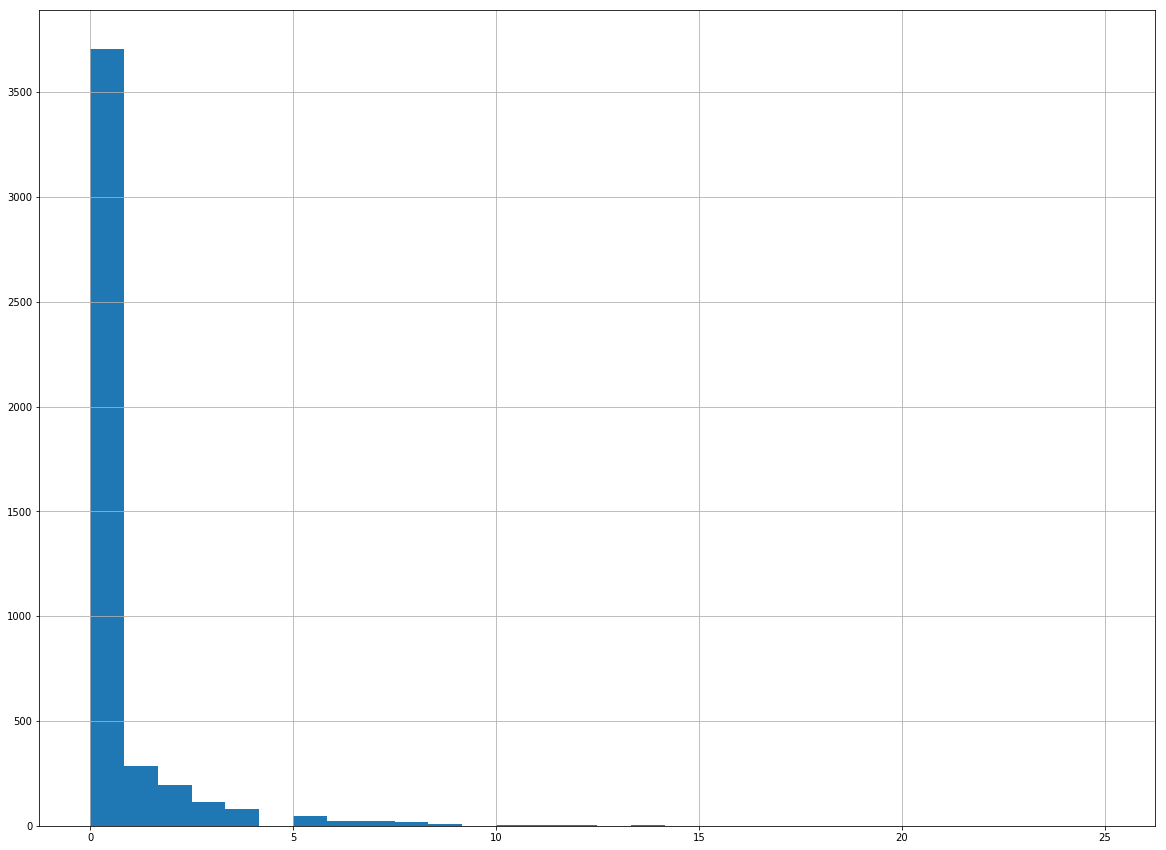

In [53]:
bank['previous'].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

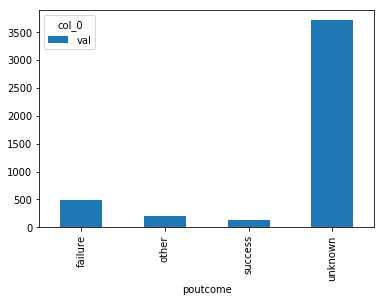

In [54]:
pd.crosstab(index = bank['poutcome'], columns = 'val').plot.bar()

Text(0.0, 1.0, 'Subcription to the term deposit\n% of Total Clients')

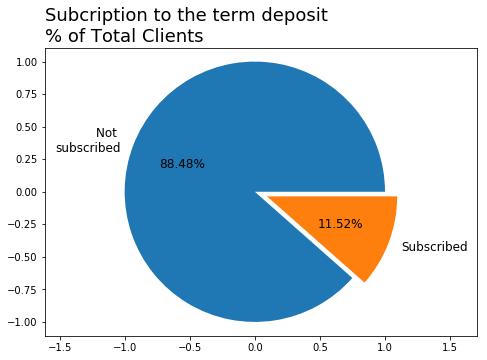

In [57]:
# Pie chart
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)  # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(bank['y'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')

<Figure size 720x360 with 0 Axes>

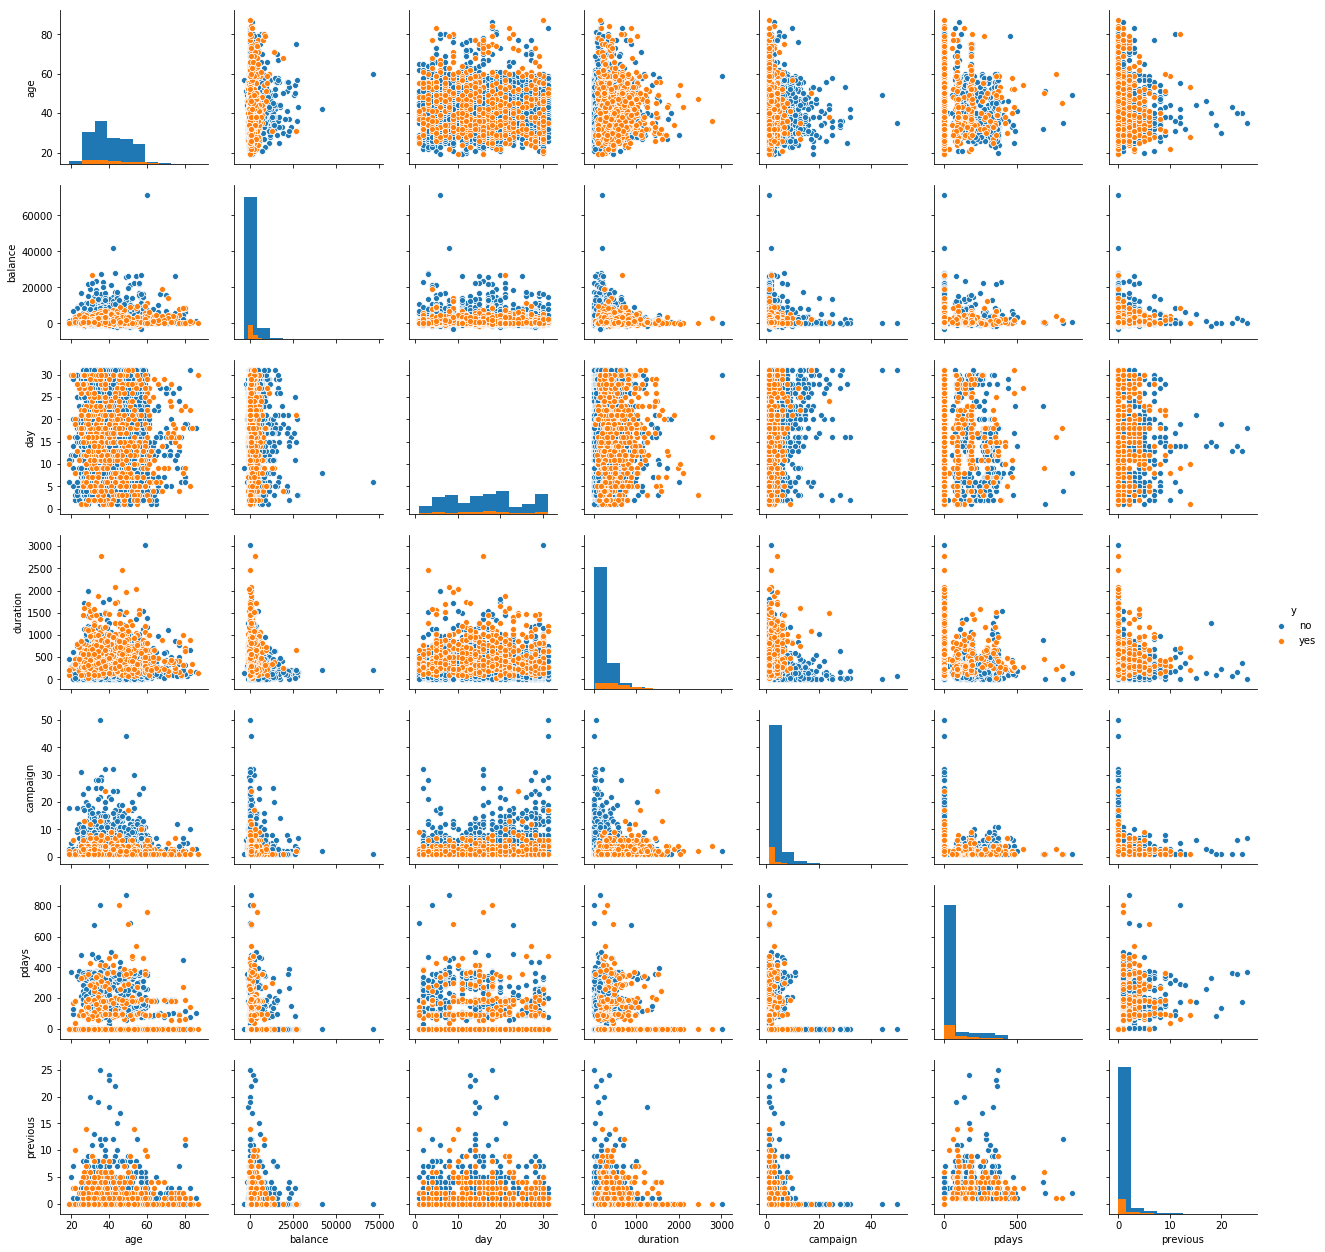

In [19]:
plt.figure(figsize=(10,5))
sns.pairplot(bank, hue = 'y', diag_kind = 'hist')

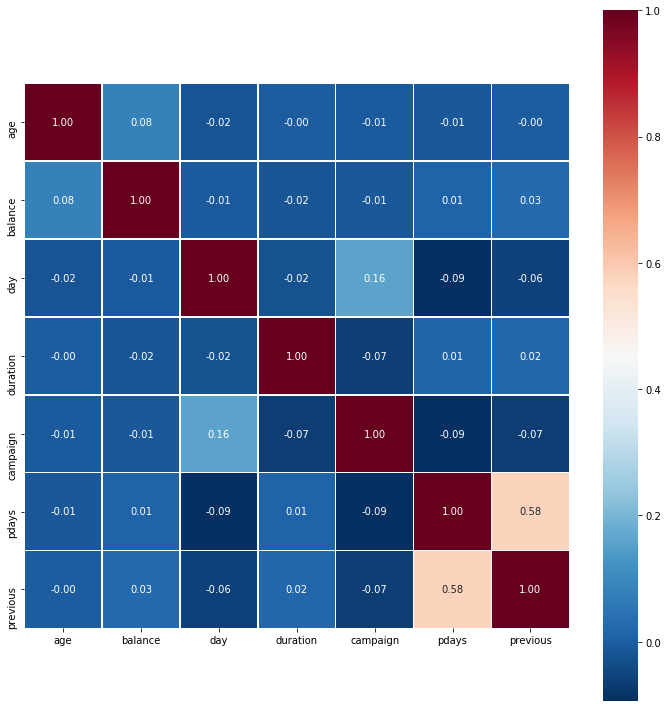

In [58]:
# Visualize feature correlations
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(bank._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

# Step 2: Data cleaning and preparation

In [8]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


#### Luckily, our dataset does not contain missing data. Hence, we can skip this step.

### dummy variable : For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [10]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy = pd.get_dummies(bank[['job','marital','education','contact','month','poutcome']], drop_first = True)

# Adding the results to the master dataframe
bank = pd.concat([bank, dummy], axis=1)

In [11]:
bank.drop(['job', 'marital', 'education', 'contact','month','poutcome'], axis = 1, inplace = True)

- You can see that your dataset has many columns with values as 'Yes' or 'No'.
- Instead of dummy we can change it to 0 for 'no' and 1 for 'yes'

In [12]:
# List of variables to map

varlist =  ['default', 'housing', 'loan', 'y']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
bank[varlist] = bank[varlist].apply(binary_map)

In [13]:
bank.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,0,1,0,0,0,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [14]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 43 columns):
age                    4521 non-null int64
default                4521 non-null int64
balance                4521 non-null int64
housing                4521 non-null int64
loan                   4521 non-null int64
day                    4521 non-null int64
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
y                      4521 non-null int64
job_blue-collar        4521 non-null uint8
job_entrepreneur       4521 non-null uint8
job_housemaid          4521 non-null uint8
job_management         4521 non-null uint8
job_retired            4521 non-null uint8
job_self-employed      4521 non-null uint8
job_services           4521 non-null uint8
job_student            4521 non-null uint8
job_technician         4521 non-null uint8
job_unemployed         4521 non-n

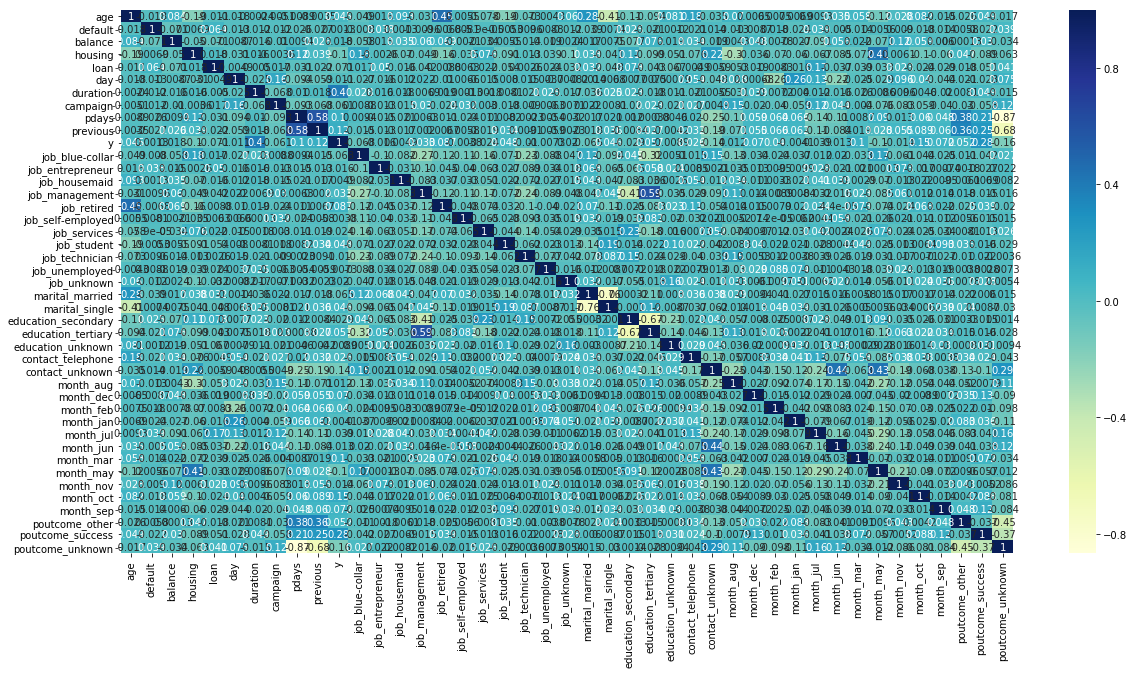

In [15]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(bank.corr(), annot = True, cmap="YlGnBu")
plt.show()

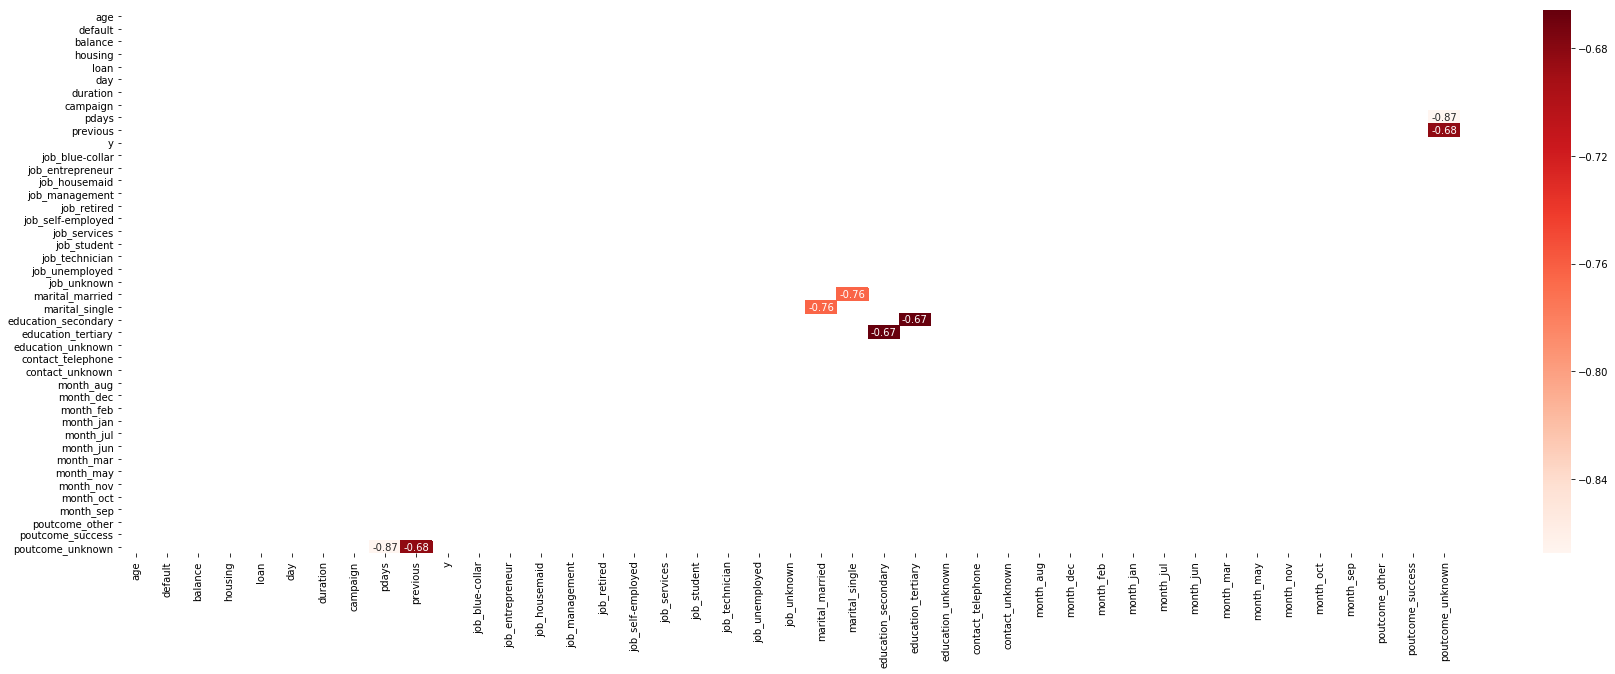

In [40]:
Corr = bank.corr()
filtered_r = Corr[((Corr > .6) | (Corr < -.6)) & (Corr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filtered_r, annot=True, cmap="Reds")
plt.show()

#### deal with outlier
- Remove outliers from  “age”, “duration” and “balance” Using “IQR” formula to detect outliers i.e values < Q1(0.25) - 1.5*IQR(Q3 - Q1) and values > Q3(0.75) + 1.5*IQR .

In [16]:
# Checking for outliers in the continuous variables
num_bank = bank[['age','balance','duration']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_bank.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,age,balance,duration
count,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292
std,10.576211,3009.638142,259.856633
min,19.000000,-3313.000000,4.000000
25%,33.000000,69.000000,104.000000
50%,39.000000,444.000000,185.000000
75%,49.000000,1480.000000,329.000000
90%,56.000000,3913.000000,579.000000
95%,59.000000,6102.000000,763.000000
99%,72.000000,14194.600000,1259.000000


In [17]:
Q1 = bank[['age','balance','duration']].quantile(0.25)
Q3 = bank[['age','balance','duration']].quantile(0.75)
IQR = Q3 - Q1

bank = bank[~((bank[['age','balance','duration']] < (Q1 - 1.5 * IQR)) |(bank[['age','balance','duration']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
bank.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
count,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,...,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000,3698.000000
mean,40.613304,0.019200,641.883991,0.573824,0.160627,15.836128,207.371823,2.788534,39.847756,0.517307,...,0.164413,0.114927,0.008653,0.319091,0.071931,0.015684,0.012710,0.042996,0.025690,0.823688
std,9.951941,0.137244,868.003113,0.494587,0.367237,8.334479,147.452993,3.156740,101.140103,1.664551,...,0.370700,0.318977,0.092632,0.466188,0.258408,0.124267,0.112033,0.202876,0.158229,0.381137
min,19.000000,0.000000,-1746.000000,0.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,42.000000,0.000000,0.000000,8.000000,97.250000,1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,0.000000,331.000000,1.000000,0.000000,16.000000,169.000000,2.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,0.000000,975.000000,1.000000,0.000000,22.000000,279.000000,3.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,73.000000,1.000000,3587.000000,1.000000,1.000000,31.000000,665.000000,50.000000,871.000000,25.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Test-Train Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Putting feature variable to X
X = bank.drop(['y'], axis=1)

X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
5,35,0,747,0,0,23,141,2,176,3,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Putting response variable to y
Y = bank['y']

Y.head()

0    0
2    0
3    0
4    0
5    0
Name: y, dtype: int64

In [22]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [23]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2588, 42)
Number transactions y_train dataset:  (2588,)
Number transactions X_test dataset:  (1110, 42)
Number transactions y_test dataset:  (1110,)


### Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

X_train[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(X_train[['age','balance','day','duration','campaign','pdays','previous']])

X_train.head()

C:\Users\Vishnu Kant Shukla\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Vishnu Kant Shukla\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
1980,1.586752,0,1.610741,0,0,-0.928276,1.294106,-0.571852,2.655829,0.268536,...,0,0,0,0,0,0,0,0,1,0
3517,-1.573046,0,0.312324,1,0,-0.449858,-0.167003,-0.258435,-0.398827,-0.306295,...,0,0,0,1,0,0,0,0,0,1
1637,0.261675,0,0.655411,1,0,-1.167485,-0.014250,0.054981,-0.398827,-0.306295,...,0,0,0,1,0,0,0,0,0,1
1130,-1.165330,0,0.269583,0,0,-1.526299,-0.293189,0.054981,-0.398827,-0.306295,...,0,0,0,0,0,0,0,0,0,1
3543,-0.146040,0,-0.736575,1,0,0.267770,-0.585411,0.054981,3.174920,1.993028,...,0,0,0,1,0,0,0,0,0,0


In [26]:
### Checking the Churn Rate
y_rate = (sum(bank['y'])/len(bank['y'].index))*100
y_rate

7.977285018929151

We have almost 7% y rate

# Step 3: Model Building
Let's start by splitting our data into a training set and a test set.

- Running Your First Training Model

In [27]:
import statsmodels.api as sm

In [28]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 2588
Model:                            GLM   Df Residuals:                     2545
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -502.18
Date:                Sat, 28 Aug 2021   Deviance:                       1004.4
Time:                        21:34:23   Pearson chi2:                 1.96e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.9112      0.682     -2.804      0.005      -3.247      -0.575
age                    -0.2217      0.111     -2.004      0.045      -0.439      -0.005
default                 0.4908      0.604      0.813      0.416      -0.692       1.674
balance                 0.2311      0.080      2.893      0.004       0.075       0.388
housing                -0.3343      0.198     -1.684      0.092      -0.723       0.055
loan                   -1.2323      0.341     -3.618      0.000      -1.900      -0.565
day                     0.0019      0.103      0.018      0.985      -0.199       0.203
duration                0.9700      0.078     12.472      0.000       0.818       1.122
campaign               -0.4387      0.165     -2.665      0.008      -0.761      -0.116
pdays                  -0.0241      0.137     -0.176      0.860      -0.293       0.244
previous               -0.0152      0.087     -0.174      0.862      -0.186       0.156
job_blue-collar        -0.5241      0.349     -1.500      0.134      -1.209       0.161
job_entrepreneur        0.2708      0.531      0.510      0.610      -0.771       1.312
job_housemaid          -0.1788      0.686     -0.261      0.794      -1.522       1.165
job_management          0.2860      0.347      0.825      0.409      -0.393       0.965
job_retired             0.8087      0.497      1.628      0.104      -0.165       1.783
job_self-employed      -0.0544      0.560     -0.097      0.923      -1.153       1.044
job_services           -0.1386      0.385     -0.360      0.719      -0.893       0.616
job_student             0.4428      0.524      0.844      0.398      -0.585       1.471
job_technician         -0.1073      0.327     -0.328      0.743      -0.748       0.533
job_unemployed         -0.2647      0.546     -0.485      0.628      -1.334       0.805
job_unknown             0.5153      0.879      0.586      0.558      -1.207       2.238
marital_married        -0.1614      0.281     -0.575      0.565      -0.711       0.389
marital_single         -0.1687      0.322     -0.524      0.600      -0.800       0.462
education_secondary     0.4103      0.340      1.206      0.228      -0.257       1.077
education_tertiary     -0.0455      0.381     -0.120      0.905      -0.791       0.700
education_unknown      -0.7670      0.582     -1.317      0.188      -1.908       0.374
contact_telephone       0.4391      0.358      1.226      0.220      -0.263       1.141
contact_unknown        -1.8117      0.364     -4.976      0.000      -2.525      -1.098
month_aug              -0.1360      0.357     -0.381      0.703      -0.836       0.564
month_dec               0.9694      1.191      0.814      0.416      -1.366       3.304
month_feb              -0.0165      0.424     -0.039      0.969      -0.847       0.814
month_jan              -1.3641      0.599     -2.277      0.023      -2.538      -

### Feature Selection Using RFE

We’ll select the top 15 variables, which helps in building the model in our logistic regression.

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [31]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [32]:
rfe.support_

array([False, False, False, False,  True, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True])

In [33]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 17),
 ('default', False, 14),
 ('balance', False, 15),
 ('housing', False, 4),
 ('loan', True, 1),
 ('day', False, 27),
 ('duration', True, 1),
 ('campaign', False, 3),
 ('pdays', False, 26),
 ('previous', False, 28),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 24),
 ('job_housemaid', False, 5),
 ('job_management', False, 23),
 ('job_retired', False, 16),
 ('job_self-employed', False, 9),
 ('job_services', False, 12),
 ('job_student', True, 1),
 ('job_technician', False, 13),
 ('job_unemployed', False, 10),
 ('job_unknown', False, 22),
 ('marital_married', False, 18),
 ('marital_single', False, 19),
 ('education_secondary', False, 11),
 ('education_tertiary', False, 25),
 ('education_unknown', True, 1),
 ('contact_telephone', False, 6),
 ('contact_unknown', True, 1),
 ('month_aug', False, 8),
 ('month_dec', False, 2),
 ('month_feb', False, 20),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', True, 1),
 ('month_mar', True, 1),
 ('month_ma

In [34]:
col = X_train.columns[rfe.support_]

In [35]:
X_train.columns[~rfe.support_]

Index(['age', 'default', 'balance', 'housing', 'day', 'campaign', 'pdays',
       'previous', 'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'contact_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_nov', 'poutcome_other'],
      dtype='object')

In [36]:
col = X_train.columns[rfe.support_]

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 2588
Model:                            GLM   Df Residuals:                     2572
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -520.50
Date:                Sat, 28 Aug 2021   Deviance:                       1041.0
Time:                        21:35:27   Pearson chi2:                 2.13e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.8426      0.207     -8.908      0.000      -2.248      -1.437
loan                 -1.2392      0.333     -3.724      0.000      -1.891      -0.587
duration              0.9760      0.075     13.084      0.000       0.830       1.122
job_blue-collar      -0.5191      0.243     -2.139      0.032      -0.995      -0.043
job_student           0.7095      0.441      1.610      0.107      -0.154       1.573
education_unknown    -0.8427      0.472     -1.787      0.074      -1.767       0.082
contact_unknown      -1.9854      0.360     -5.522      0.000      -2.690      -1.281
month_jan            -1.0748      0.511     -2.104      0.035      -2.076      -0.074
month_jul            -0.6849      0.272     -2.515      0.012      -1.219      -0.151
month_jun             1.2333      0.325      3.796      0.000       0.597       1.870
month_mar             2.6998      0.527      5.124      0.000       1.667       3.733
month_may            -0.6040      0.255     -2.370      0.018      -1.104      -0.105
month_oct             1.6663      0.406      4.107      0.000       0.871       2.461
month_sep             1.3860      0.533      2.601      0.009       0.342       2.430
poutcome_success      2.0643      0.353      5.848      0.000       1.372       2.756
poutcome_unknown     -0.6546      0.211     -3.109      0.002      -1.067      -0.242
=====================================================================================
"""

In [37]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1980    0.655224
3517    0.036821
1637    0.003613
1130    0.058234
3543    0.046621
3815    0.039677
172     0.064116
1678    0.021142
1289    0.011851
2647    0.071124
dtype: float64

In [38]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.65522416, 0.03682111, 0.00361312, 0.05823432, 0.04662121,
       0.03967736, 0.06411595, 0.02114155, 0.01185125, 0.07112416])

##### Create a dataframe with the actual y's and the predicted probabilities.

In [39]:
y_train_pred_final = pd.DataFrame({'y':y_train.values, 'y_Prob':y_train_pred})
y_train_pred_final.head()

,y,y_Prob
0,0,0.655224
1,0,0.036821
2,0,0.003613
3,0,0.058234
4,0,0.046621


#### Create a new column 'predicted'  with 1 if yes_prob > “0.5” else 0 .

In [40]:
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,y,y_Prob,predicted
0,0,0.655224,1
1,0,0.036821,0
2,0,0.003613,0
3,0,0.058234,0
4,0,0.046621,0


#### Calculate “Confusion matrix” using y_true and y_predicted.

In [41]:
from sklearn import metrics

In [42]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)

[[2323   35]
 [ 164   66]]


#### check the overall “accuracy”.

- The accuracy will be,

acc = (2323+66)/(2323+35+164+66) = 0.923 = 92.3%
The model we have built is approximately 92% accurate.

In [43]:
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

0.9231066460587326


### Checking VIF

Now let’s check the VIF values for the above model to see whether any of the variables are highly correlated.

In [44]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,contact_unknown,3.06
14,poutcome_unknown,2.80
10,month_may,2.55
8,month_jun,2.00
7,month_jul,1.53
2,job_blue-collar,1.30
0,loan,1.23
13,poutcome_success,1.09
4,education_unknown,1.06
12,month_sep,1.06


- Luckily, Our `vairance inflation factor's` are in range, that means we have better model
- So we need not drop any more variables and we can proceed with making predictions using this model only

The matrix looks like this,

- `Actual/Predicted`           `No`                 `Yes`
          No               2323        35
          Yes              164         66  
- overall accuracy = 0.9231066460587326

# Step 4: Model evaluation

### Metrics beyond simply accuracy :

#### So, apart from Accuracy, we have another three more important metrics:
- Sensitivity /Recall
- Specificity
- Precision

In [45]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Sensitivity /Recall

For cancer types of problems, we use sensitivity. So we should build a model, which results in high sensitivity, i.e., the value of FN(False Negative) should be as low as possible.
- Sensitivity = `(TP)/(TP+FN)`

In [46]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.28695652173913044

### Specificity
For fraudulent transaction types of cases, we build a model having high specificity, i.e., the value of FP(False Positive) should be as low as possible.
- Specificity = `(TN)/(TN+FP)`

In [47]:
# Let us calculate specificity
TN / float(TN+FP)

0.9851569126378287

- Calculate false postive rate.

In [48]:
# Calculate false postive rate: predicting Yes when people does not have subscribed yet
print(FP/ float(TN+FP))

0.014843087362171332


- calculate positive predictive value .

In [49]:
# positive predictive value 
print (TP / float(TP+FP))

0.6534653465346535


- Calculate Negative predictive value 

In [50]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9340570969039003


### Precision and Recall

- Looking at the confusion matrix again

In [52]:
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
confusion

array([[2323,   35],
       [ 164,   66]], dtype=int64)

#### Precision
- `TP / (TP + FP)`

In [53]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6534653465346535

#### Recall
- `TP / (TP + FN)`

In [54]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.28695652173913044

### Plotting the ROC Curve

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [55]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [57]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.y, y_train_pred_final.y_Prob, drop_intermediate = False )

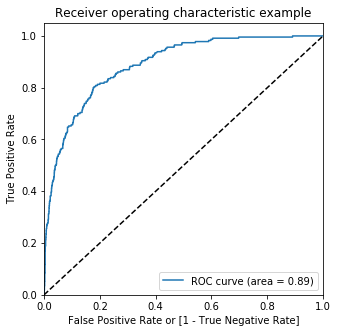

In [59]:
draw_roc(y_train_pred_final.y, y_train_pred_final.y_Prob)

### Finding Optimal Cutoff Point

- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [60]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.655224,1,1,1,1,1,1,1,1,0,0,0
1,0,0.036821,0,1,0,0,0,0,0,0,0,0,0
2,0,0.003613,0,1,0,0,0,0,0,0,0,0,0
3,0,0.058234,0,1,0,0,0,0,0,0,0,0,0
4,0,0.046621,0,1,0,0,0,0,0,0,0,0,0


In [61]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.088872  1.000000  0.000000
0.1   0.1  0.832303  0.756522  0.839695
0.2   0.2  0.898377  0.604348  0.927057
0.3   0.3  0.918470  0.486957  0.960560
0.4   0.4  0.922720  0.386957  0.974979
0.5   0.5  0.923107  0.286957  0.985157
0.6   0.6  0.925811  0.243478  0.992366
0.7   0.7  0.923107  0.178261  0.995759
0.8   0.8  0.915765  0.086957  0.996607
0.9   0.9  0.913060  0.043478  0.997880


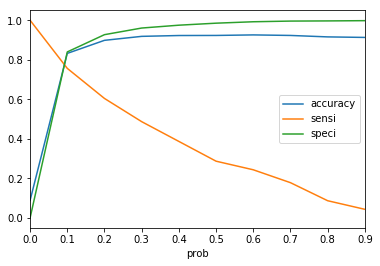

In [62]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [63]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.655224,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.036821,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.003613,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.058234,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.046621,0,1,0,0,0,0,0,0,0,0,0,0


In [64]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.final_predicted)

0.9184698608964451

In [65]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.final_predicted )
confusion2

array([[2265,   93],
       [ 118,  112]], dtype=int64)

In [66]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [67]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.48695652173913045

In [68]:
# Let us calculate specificity
TN / float(TN+FP)

0.960559796437659

In [69]:
# Calculate false postive rate - predicting Yes when customer does not have subscribed
print(FP/ float(TN+FP))

0.039440203562340966


In [70]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5463414634146342


In [71]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9504825849769198


#### Precision and recall tradeoff

In [73]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.y, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      1
 22      0
 23      0
 24      0
 25      0
 26      1
 27      0
 28      0
 29      0
        ..
 2558    0
 2559    0
 2560    0
 2561    0
 2562    0
 2563    0
 2564    0
 2565    0
 2566    0
 2567    0
 2568    0
 2569    0
 2570    1
 2571    0
 2572    0
 2573    0
 2574    0
 2575    0
 2576    0
 2577    0
 2578    0
 2579    0
 2580    1
 2581    0
 2582    0
 2583    0
 2584    0
 2585    0
 2586    1
 2587    0
 Name: y, Length: 2588, dtype: int64, 0       1
 1       0
 2       0
 3       0
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      0
 13      1
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      0
 26   

In [74]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.y, y_train_pred_final.y_Prob)

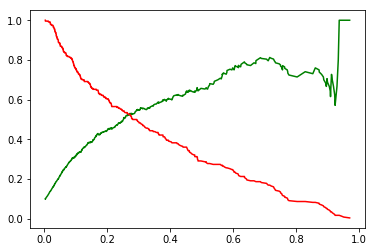

In [75]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Solutions for the Next Marketing Campaign (Conclusion) :

- 1) Months of Marketing Activity: `We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)`


- 2) Seasonality: `Potential clients opted to suscribe term deposits during the seasons of fall and winter. The next marketing campaign should focus its activity throghout these seasons.`


- 3) Campaign Calls: `A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit.`


- 4) Age Category: `The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions.`


- 5) Occupation: `Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.`


- 6) House Loans and Balances: `Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit.`



- 7) Develop a Questionaire during the Calls: `Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute.`


- 8) Target individuals with a higher duration (above 375): `Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account.


By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.